In [6]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv("H:\indian_liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [9]:
print('Number of Males',df[df['Gender'] == 'Male'].Age.count())
print('Number of Females',df[df['Gender'] == 'Female'].Age.count())

Number of Males 441
Number of Females 142


In [10]:
df.isnull().sum() #check for the null values...

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [11]:
df['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815197

In [12]:
#we have filled the null values with the mean of that column
df=df.fillna(0.94) 

In [13]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

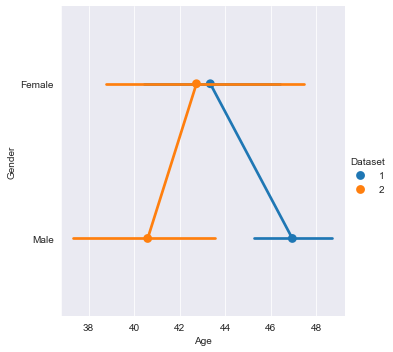

In [24]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=df);

#Age seems to be a factor for liver disease for both male and female genders

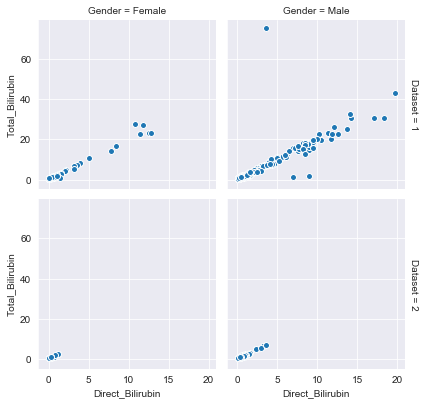

In [26]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9) 

# "Direct_Bilirubin" & "Total_Bilirubin" got linear relationship

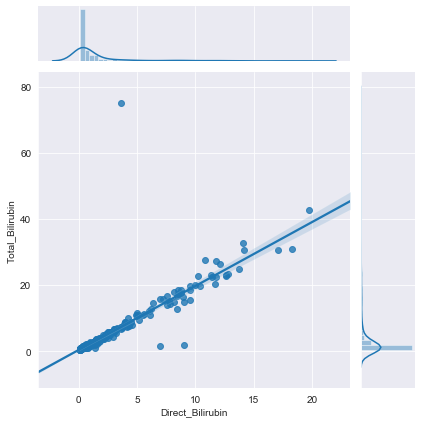

In [34]:
sns.jointplot("Direct_Bilirubin", "Total_Bilirubin", data=df, kind="reg")

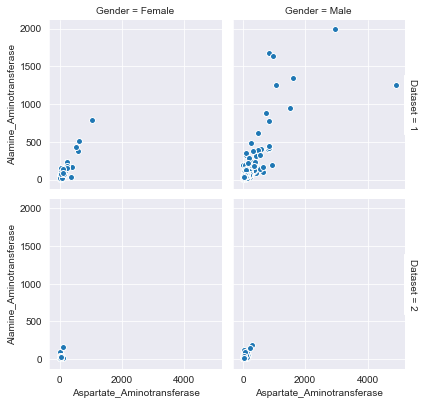

In [28]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase", edgecolor="w")
plt.subplots_adjust(top=0.9) 

# "Aspartate_Aminotransferase", "Alamine_Aminotransferase" got linear relationship

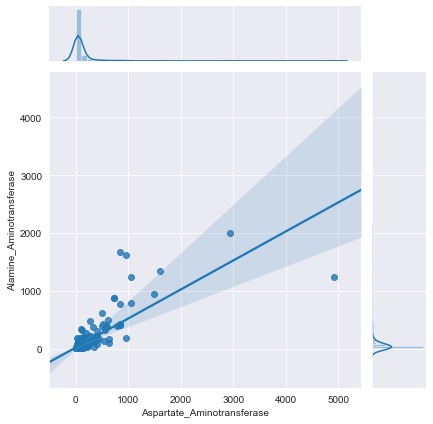

In [33]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=df, kind="reg")

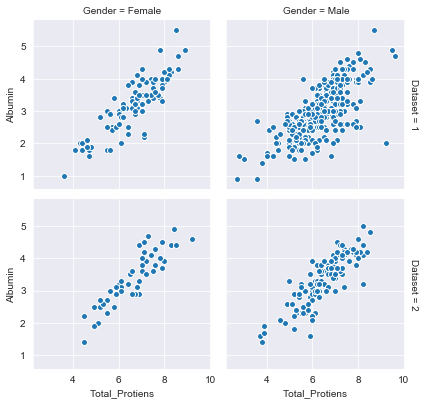

In [29]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin", edgecolor="w")
plt.subplots_adjust(top=0.9) 

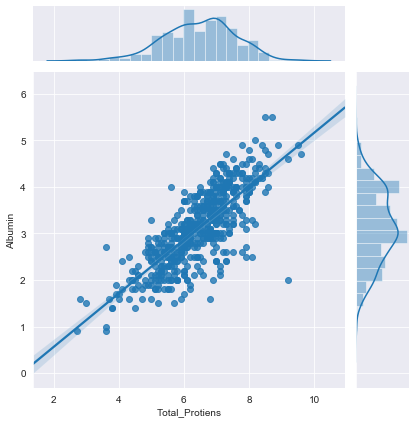

In [35]:
sns.jointplot("Total_Protiens", "Albumin", data=df, kind="reg")

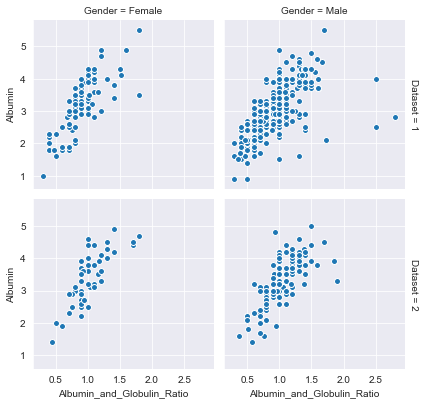

In [30]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Albumin", edgecolor="w")
plt.subplots_adjust(top=0.9) 
# "Albumin_and_Globulin_Ratio", "Albumin" linear relationship

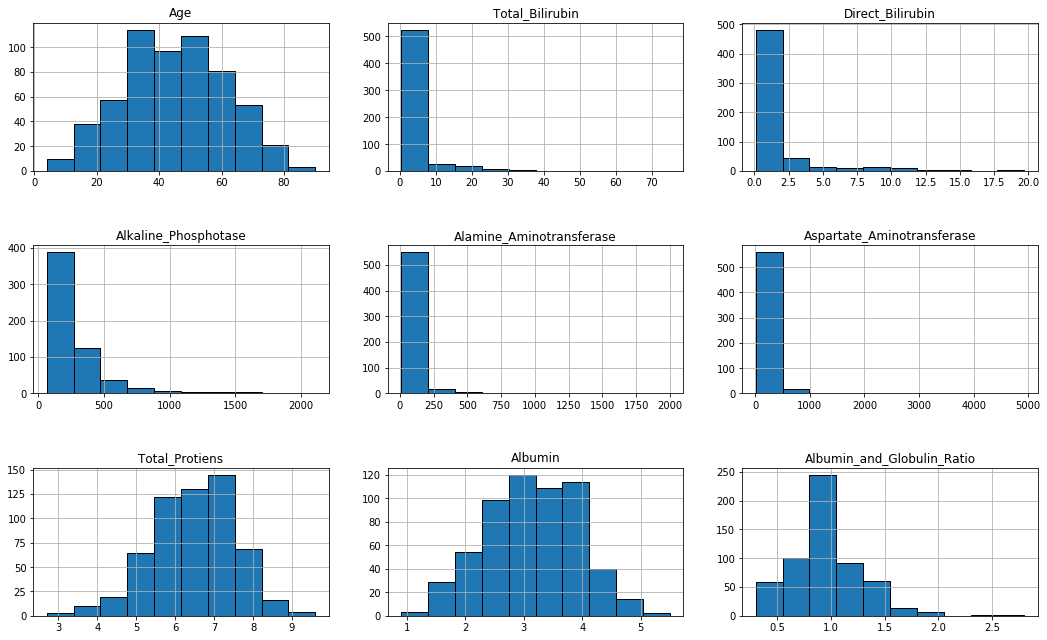

In [7]:
columns=list(df.columns[:10])
columns.remove('Gender')
plt.subplots(figsize=(18,15))
length=len(columns) 
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=10,edgecolor='black')#,range=(0,0.3))
    plt.title(i)
plt.show()  

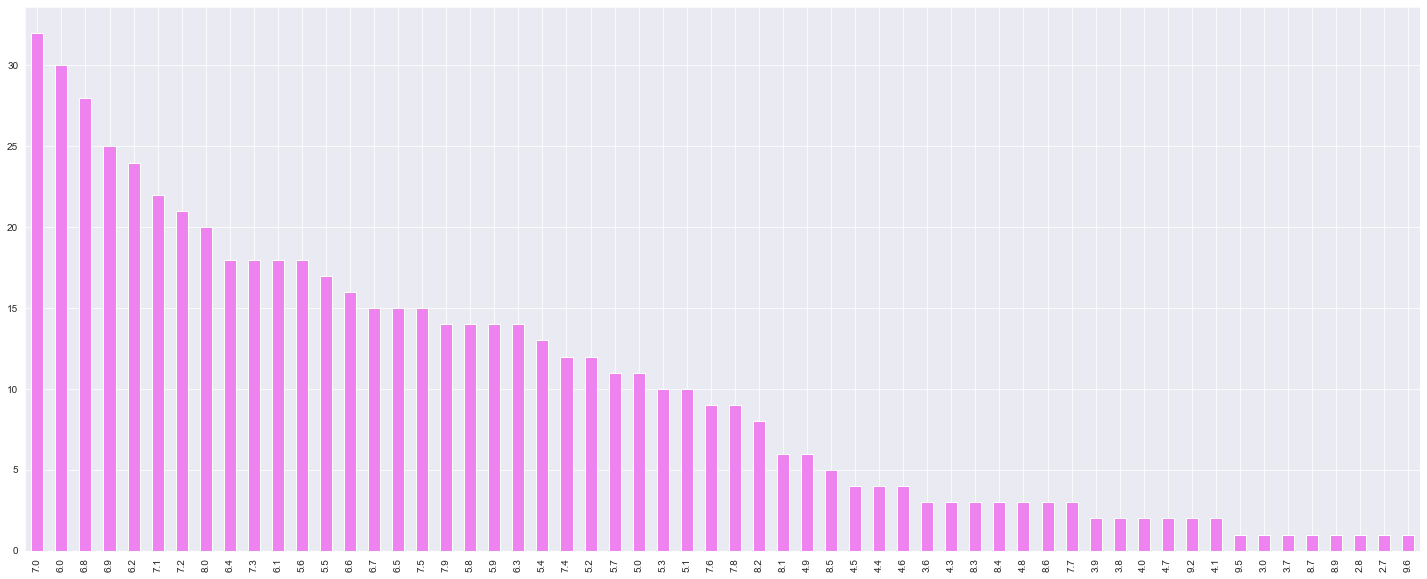

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
df['Total_Protiens'].value_counts().plot.bar(color='violet')

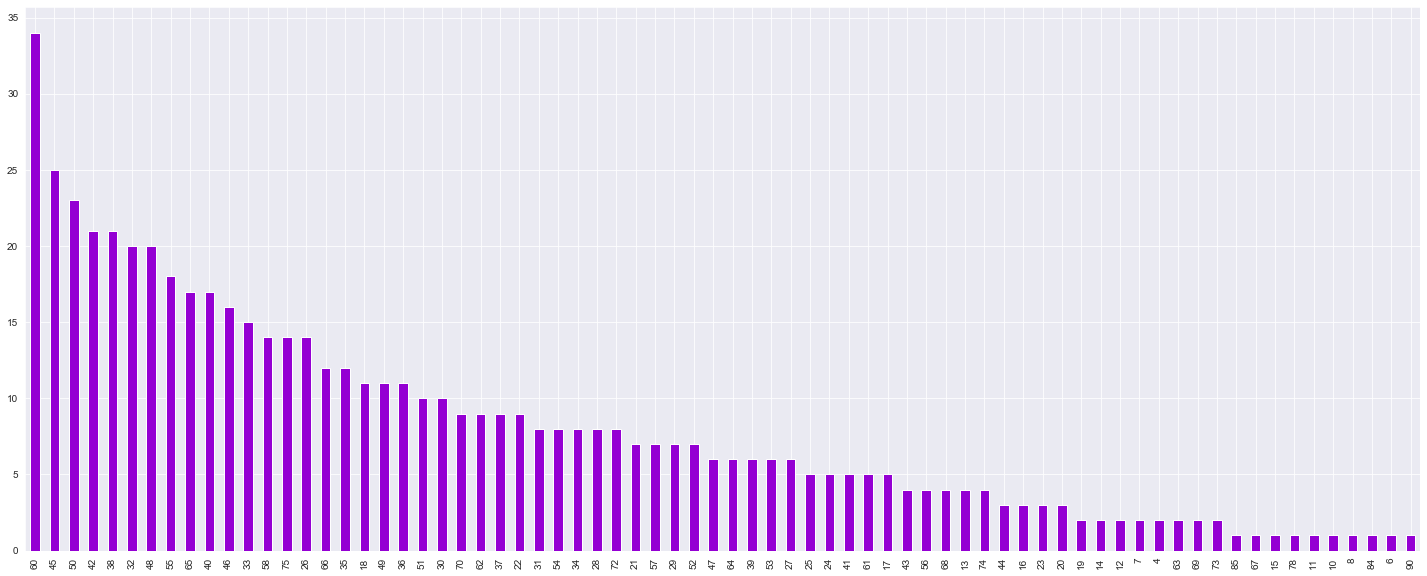

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
df['Age'].value_counts().plot.bar(color='darkviolet')